In [2]:
import matplotlib.pyplot as plt
import numpy as np
import Preprocessing as pp
from scipy import optimize
import math

In [3]:
temp_data_folder = "../Data/Temp_Data/"
image_path = "../Images/"
image_subfolder = "Proposal/"
image_folder = image_path + image_subfolder

pp.checkFolder(temp_data_folder)
pp.checkFolder(image_path)
pp.checkFolder(image_folder)

Folder already exists.
Folder already exists.
Folder already exists.


In [4]:
#colors
kit_green = '#009682'
kit_blue = '#4664AA'
kit_orange = '#DF9B1B'

In [5]:
window_size = 10
df_4 = pp.openCSVFile('experiment_1_short.csv', temp_data_folder)
th_average = df_4['th_power'].rolling(window_size).mean()
th_average[:window_size] = df_4['th_power'][:window_size]

In [6]:
df_4

,spinning_soll,time,el_power,th_power,input_voltage,spinning_ist
0,3995.032402,816.66434,1262.974403,5629.445104,10,3073
1,3997.257544,817.66344,1248.077560,5053.778423,10,3073
2,3994.803267,818.66254,1245.101476,5552.107288,10,3073
3,3998.759567,819.66164,1275.365542,5040.901647,10,3073
4,3996.288215,820.66074,1263.214415,5195.793514,10,3073
...,...,...,...,...,...,...
9920,3073.746142,10728.25174,962.304148,9428.635990,3,0
9921,3070.180076,10729.25084,967.195581,9660.552297,3,0
9922,3072.540249,10730.24994,944.425298,9858.640540,3,0
9923,3067.327744,10731.24904,963.005732,9652.190866,3,0


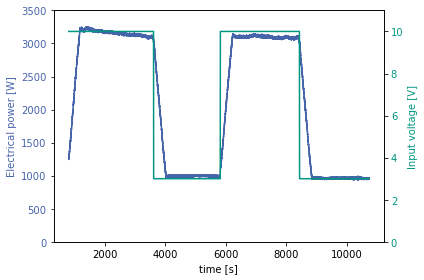

In [7]:
fig, ax1 = plt.subplots()

color = kit_blue
ax1.plot(df_4['time'], df_4['el_power'], label = 'electrical power', color = color)
ax1.set_xlabel('time [s]')
ax1.set_ylabel('Electrical power [W]', color = color)
ax1.set_ylim([0,3500])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = kit_green
ax2.plot(df_4['time'], df_4['input_voltage'], label = 'input voltage', color = color)
ax2.set_ylabel('Input voltage [V]', color = color)
ax2.set_ylim([0, 11])
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.savefig(image_folder + 'ex4_inputvoltage_electric.svg')
plt.savefig(image_folder + 'ex4_inputvoltage_electric.png')
plt.show()

In [8]:
df_4b = pp.openCSVFile('experiment_4b_short.csv', temp_data_folder)

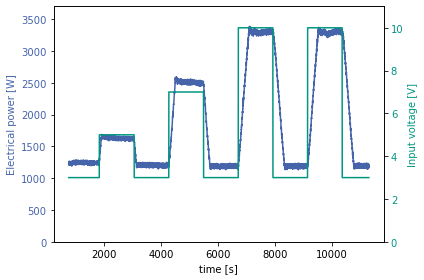

In [9]:
fig, ax1 = plt.subplots()

color = kit_blue
ax1.plot(df_4b['time'], df_4b['el_power'], label = 'electrical power', color = color)
ax1.set_xlabel('time [s]')
ax1.set_ylabel('Electrical power [W]', color = color)
ax1.set_ylim([0,3700])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = kit_green
ax2.plot(df_4b['time'], df_4b['input_voltage'], label = 'input voltage', color = color)
ax2.set_ylabel('Input voltage [V]', color = color)
ax2.set_ylim([0, 11])
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.savefig(image_folder + 'ex4_inputvoltage_electric.svg')
plt.savefig(image_folder + 'ex4_inputvoltage_electric.png')
plt.show()

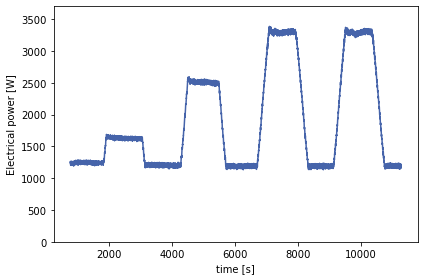

In [10]:
fig, ax1 = plt.subplots()

color = kit_blue
ax1.plot(df_4b['time'], df_4b['el_power'], label = 'electrical power', color = color)
ax1.set_xlabel('time [s]')
ax1.set_ylabel('Electrical power [W]')
ax1.set_ylim([0,3700])

fig.tight_layout()
plt.savefig(image_folder + 'ex4_electric.svg')
plt.savefig(image_folder + 'ex4_electric.png')
plt.show()

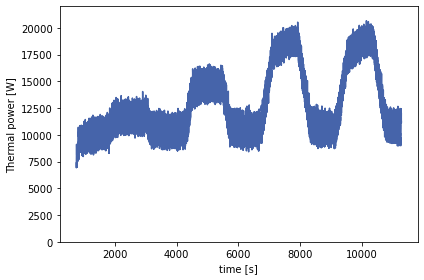

In [11]:
fig, ax1 = plt.subplots()

color = kit_blue
ax1.plot(df_4b['time'], df_4b['th_power'], label = 'thermal power', color = color)
ax1.set_xlabel('time [s]')
ax1.set_ylabel('Thermal power [W]')
ax1.set_ylim([0,22000])

fig.tight_layout()
plt.savefig(image_folder + 'ex4_thermal.svg')
plt.savefig(image_folder + 'ex4_thermal.png')
plt.show()

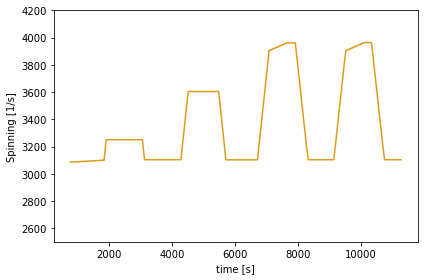

In [12]:
fig, ax1 = plt.subplots()

color = kit_orange
ax1.plot(df_4b['time'], df_4b['spinning_approx'], label = 'spinning', color = color)
ax1.set_xlabel('time [s]')
ax1.set_ylabel('Spinning [1/s]')
ax1.set_ylim([2500,4200])

fig.tight_layout()
plt.savefig(image_folder + 'ex4_spinning.svg')
plt.savefig(image_folder + 'ex4_spinning.png')
plt.show()

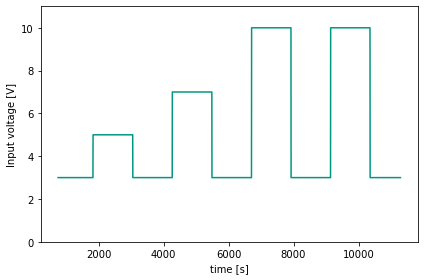

In [13]:
fig, ax1 = plt.subplots()

color = kit_green
ax1.plot(df_4b['time'], df_4b['input_voltage'], label = 'input voltage', color = color)
ax1.set_ylabel('Input voltage [V]')
ax1.set_xlabel('time [s]')
ax1.set_ylim([0, 11])

fig.tight_layout()
plt.savefig(image_folder + 'ex4_inputvoltage.svg')
plt.savefig(image_folder + 'ex4_inputvoltage.png')
plt.show()

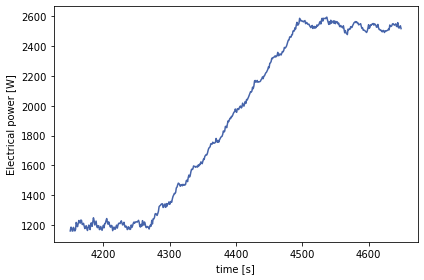

In [14]:
fig, ax1 = plt.subplots()

color = kit_blue
ax1.plot(df_4b['time'][3400:3900], df_4b['el_power'][3400:3900], label = 'input voltage', color = color)
ax1.set_ylabel('Electrical power [W]')
ax1.set_xlabel('time [s]')
#ax1.set_ylim([0, 11])

fig.tight_layout()
plt.savefig(image_folder + 'ex4_slope.svg')
plt.savefig(image_folder + 'ex4_slope.png')
plt.show()

In [34]:
data = df_4b.set_index('time').diff(60)

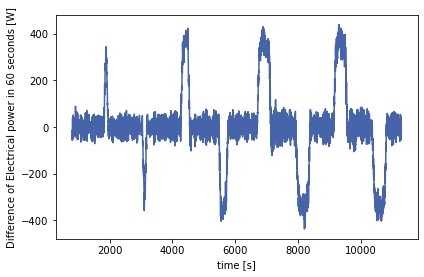

In [58]:
fig, ax1 = plt.subplots()

color = kit_blue
ax1.plot(df_4b['time'], data['el_power'], label = 'input voltage', color = color)
ax1.set_ylabel('Difference of Electrical power in 60 seconds [W]')
ax1.set_ylim([-480, 480])
ax1.set_xlabel('time [s]')
#ax1.set_ylim([0, 11])

fig.tight_layout()
plt.savefig(image_folder + 'ex4_diff.svg')
plt.savefig(image_folder + 'ex4_diff.png')
plt.show()

In [59]:
maxi = data.loc[data['el_power'].idxmax()]['el_power']
mini = data.loc[data['el_power'].idxmin()]['el_power']

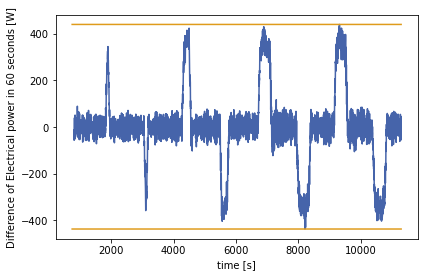

In [60]:
fig, ax1 = plt.subplots()

color = kit_blue
ax1.plot(df_4b['time'], data['el_power'], label = 'difference', color = color)
ax1.plot(df_4b['time'], np.full(len(df_4b), maxi), label = 'limits', color = kit_orange)
ax1.plot(df_4b['time'], np.full(len(df_4b), mini), color = kit_orange)
ax1.set_ylabel('Difference of Electrical power in 60 seconds [W]')
ax1.set_ylim([-480, 480])
ax1.set_xlabel('time [s]')
#ax1.set_ylim([0, 11])

fig.tight_layout()
plt.savefig(image_folder + 'ex4_diff_limits.svg')
plt.savefig(image_folder + 'ex4_diff_limits.png')
plt.show()